In [19]:
library(reticulate)
library(plotly)
library(pdp)
library(ggpubr)
library(psych)
library(caret)

set.seed(2020)

use_python("C:/Python37")
wl <- import("welly",convert = FALSE)
np <- import("numpy",convert = FALSE)

In [20]:
#Loading .las data
#Well 1 and 2
w1.las =  wl$Well$from_las('159-19A_LFP.las')
w2.las =  wl$Well$from_las('159-19BT2_LFP.las')




In [21]:
#convert to pandas dataframe
w1.pyDF = wl$Well$df(w1.las)
w2.pyDF = wl$Well$df(w2.las)
#Converto to R object
w1.rDF <- py_to_r(w1.pyDF)
w2.rDF <- py_to_r(w2.pyDF)
#Add MD as column
W1.log <- w1.rDF %>%
          select(LFP_GR,LFP_DT,LFP_NPHI,LFP_RHOB,LFP_RT) %>%
            mutate(MD = as.numeric(rownames(w1.rDF))) %>%
            filter(MD >= 3821.50, MD <=3920.15)

W2.log <- w2.rDF %>%
          select(LFP_GR,LFP_DT,LFP_NPHI,LFP_RHOB,LFP_RT) %>%
            mutate(MD = as.numeric(rownames(w2.rDF))) %>%
            filter(MD >= 4035.73, MD <=4178.60)

colnames(W1.log) <- c("GR","DT","NPHI","RHOB","RT","MD")
colnames(W2.log) <- c("GR","DT","NPHI","RHOB","RT","MD")
head(W1.log)
head(W2.log)



,GR,DT,NPHI,RHOB,RT,MD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,28.32400,78.34450,0.1998000,2.334100,3.89300,3821.582
2,26.69434,77.23495,0.2323396,2.342096,5.47851,3821.735
3,24.16866,76.24235,0.1402604,2.488304,7.77949,3821.887
4,25.46415,75.48130,0.1555899,2.487001,10.14845,3822.039
5,23.37800,74.93880,0.1564000,2.495000,11.22800,3822.192
6,25.04657,74.55793,0.1567948,2.509909,11.01159,3822.344


,GR,DT,NPHI,RHOB,RT,MD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,26.19820,72.82270,0.1087000,2.543300,0.6519000,4035.857
2,22.42190,70.74790,0.1194000,2.428300,1.6444000,4036.009
3,24.04682,70.11829,0.1097941,2.428005,1.6114999,4036.162
4,25.76038,71.32931,0.1008059,2.435995,0.6970001,4036.314
5,23.52137,73.19607,0.1411735,2.394127,0.6152533,4036.466
6,18.16810,76.02830,0.1747000,2.297300,0.4704000,4036.619


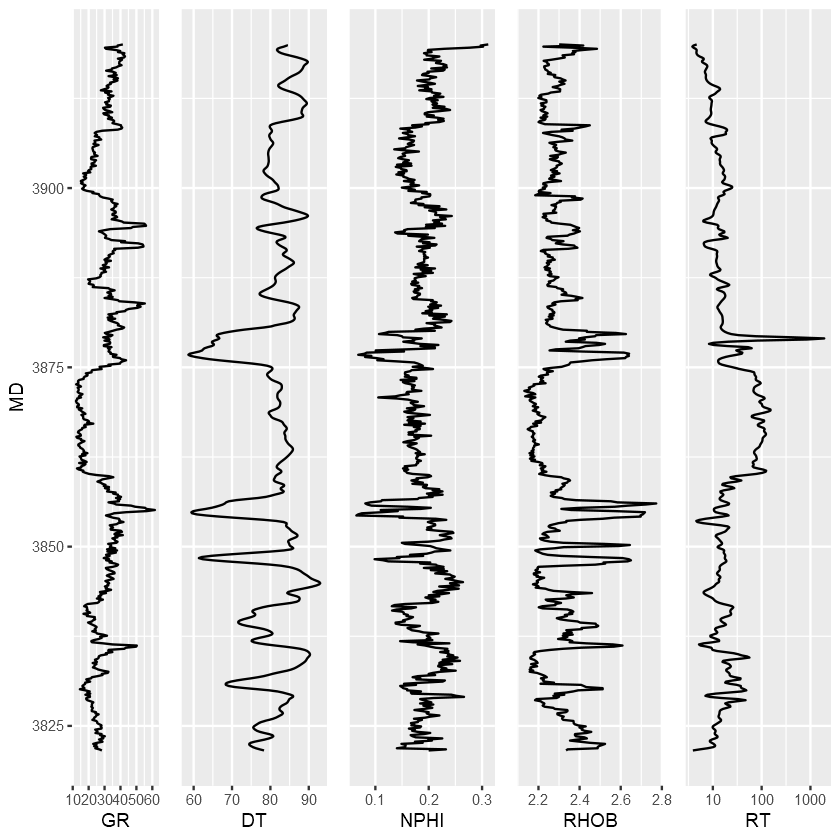

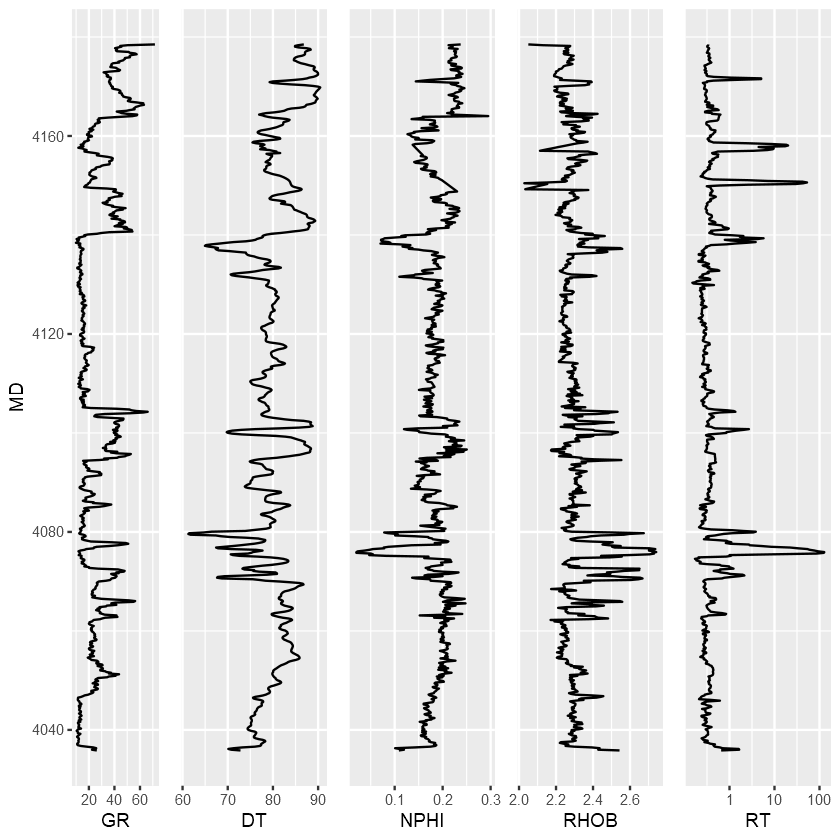

In [22]:
#Plot log data
#Well 1
p1 <- ggplot(W1.log, aes(MD,GR))+ geom_line() + coord_flip() + ylab("GR")
p2 <- ggplot(W1.log, aes(MD,DT))+ geom_line() + coord_flip() + theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) + ylab("DT") 
p3 <- ggplot(W1.log, aes(MD,NPHI))+ geom_line() + coord_flip() + theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) + ylab("NPHI")
p4 <- ggplot(W1.log, aes(MD,RHOB))+ geom_line() + coord_flip() + theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) + ylab("RHOB")
p5 <- ggplot(W1.log, aes(MD,RT))+ geom_line() + coord_flip() + scale_y_log10() + theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) + ylab("RT")

ggarrange(p1,p2,p3,p4,p5,nrow = 1,widths = c(3,3,3,3,3),heights = 3)

#well 2
p1 <- ggplot(W2.log, aes(MD,GR))+ geom_line() + coord_flip() + ylab("GR")
p2 <- ggplot(W2.log, aes(MD,DT))+ geom_line() + coord_flip() + theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) + ylab("DT") 
p3 <- ggplot(W2.log, aes(MD,NPHI))+ geom_line() + coord_flip() + theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) + ylab("NPHI")
p4 <- ggplot(W2.log, aes(MD,RHOB))+ geom_line() + coord_flip() + theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) + ylab("RHOB")
p5 <- ggplot(W2.log, aes(MD,RT))+ geom_line() + coord_flip() + scale_y_log10() + theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) + ylab("RT")

ggarrange(p1,p2,p3,p4,p5,nrow = 1)

Warning message:
"Removed 2 rows containing missing values (geom_point)."


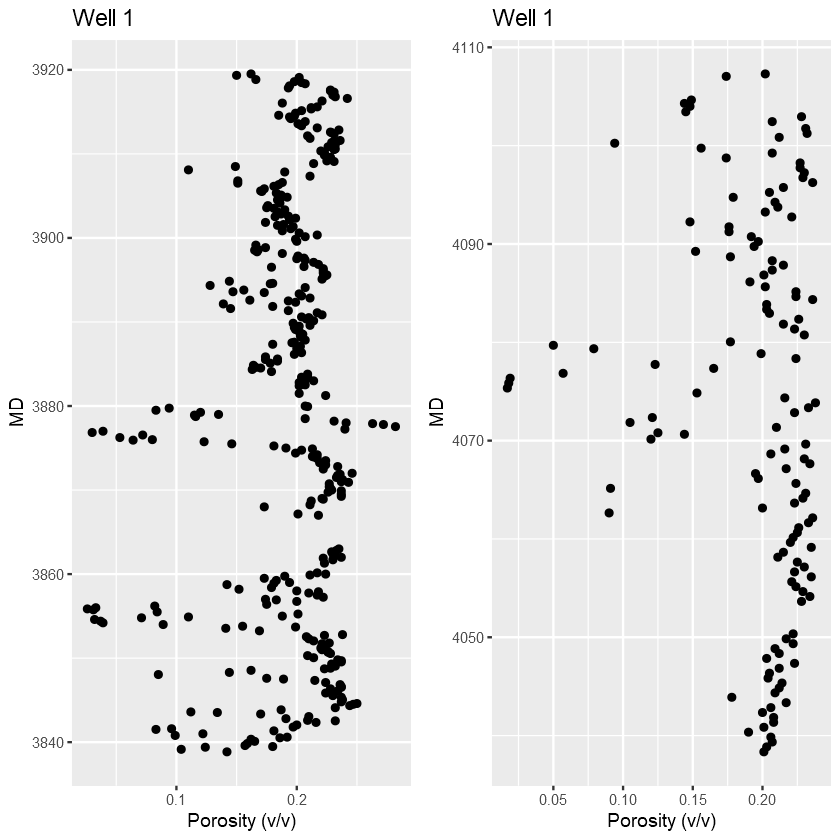

In [23]:
#load core data
W1.core <- read.csv("15_9-19_A_Core.csv")
W2.core <- read.csv("15_9-19_BT2_Core.csv")


#Plot porosity data
p1.core <- ggplot(W1.core, aes(MD,POROSITY))+ geom_point() + coord_flip() + ylab("Porosity (v/v)") + ggtitle("Well 1")
p2.core <- ggplot(W2.core, aes(MD,POROSITY))+ geom_point() + coord_flip() + ylab("Porosity (v/v)") + ggtitle("Well 1")

ggarrange(p1.core,p2.core,nrow = 1)

In [24]:
#Log data in core data frame using interpolation
W1.core$GR <- approx(x=W1.log$MD, y=W1.log$GR, xout=W1.core$MD)$y
W1.core$DT <- approx(x=W1.log$MD, y=W1.log$DT, xout=W1.core$MD)$y
W1.core$NPHI <- approx(x=W1.log$MD, y=W1.log$NPHI, xout=W1.core$MD)$y
W1.core$RHOB <- approx(x=W1.log$MD, y=W1.log$RHOB, xout=W1.core$MD)$y
W1.core$RT <- approx(x=W1.log$MD, y=W1.log$RT, xout=W1.core$MD)$y

W2.core$GR <- approx(x=W2.log$MD, y=W2.log$GR, xout=W2.core$MD)$y
W2.core$DT <- approx(x=W2.log$MD, y=W2.log$DT, xout=W2.core$MD)$y
W2.core$NPHI <- approx(x=W2.log$MD, y=W2.log$NPHI, xout=W2.core$MD)$y
W2.core$RHOB <- approx(x=W2.log$MD, y=W2.log$RHOB, xout=W2.core$MD)$y
W2.core$RT <- approx(x=W2.log$MD, y=W2.log$RT, xout=W2.core$MD)$y

head(W1.core)
head(W2.core)

,MD,POROSITY,PERMEABILITY,GR,DT,NPHI,RHOB,RT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3838.85,0.142,NA,24.71075,74.94938,0.1775530,2.484541,14.36259
2,3839.15,0.104,10.632,22.06828,72.45723,0.1452691,2.479459,18.45225
3,3839.40,0.124,0.248,19.72139,71.62805,0.1377433,2.408856,16.41255
4,3839.48,0.180,NA,20.65357,71.62304,0.1453788,2.397327,15.76819
5,3839.60,0.157,306.810,22.16444,71.75638,0.1544042,2.379677,14.96170
6,3839.85,0.159,150.954,23.94597,72.83602,0.1585486,2.309910,14.33245


,MD,POROSITY,PERMEABILITY,GR,DT,NPHI,RHOB,RT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4038.35,0.201,1973.924,11.88587,76.09389,0.1640912,2.297826,0.2490316
2,4038.85,0.203,1158.927,11.72253,75.94428,0.1548238,2.293979,0.3084022
3,4039.35,0.207,1935.117,11.46120,76.30264,0.1640788,2.288254,0.3311575
4,4039.85,0.206,1003.681,10.52521,75.04695,0.1575202,2.296767,0.3215750
5,4040.35,0.190,901.498,13.15861,74.42871,0.1587632,2.338597,0.3409879
6,4040.85,0.201,581.095,12.09045,75.10514,0.1595344,2.304129,0.2976087


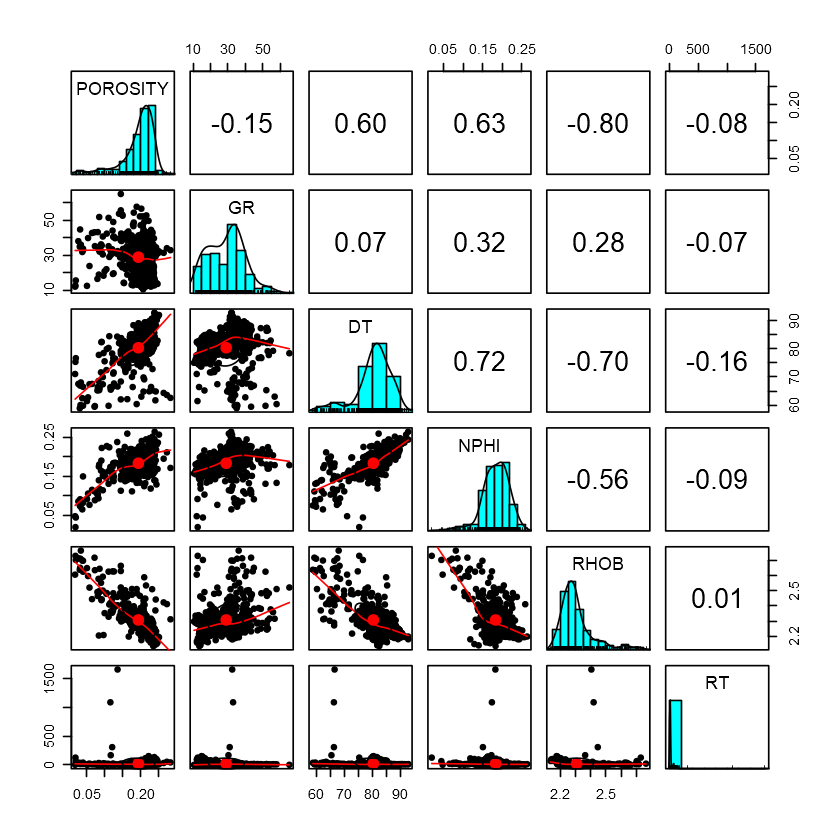

In [33]:
W.core <- rbind(W1.core,W2.core)
pairs.panels(W.core[,-c(1,3)])

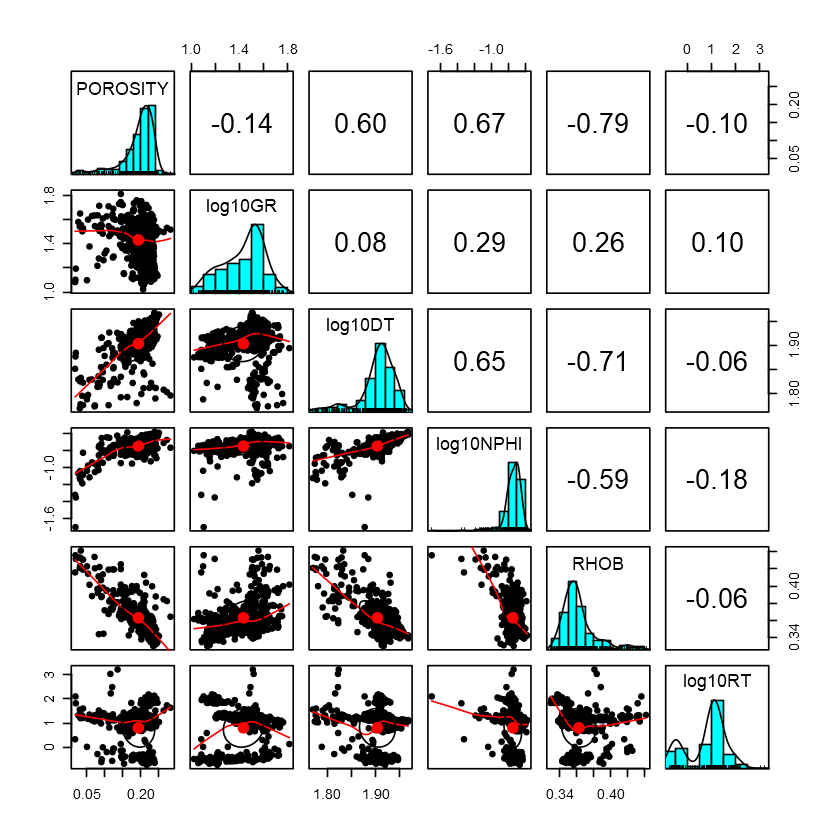

In [34]:
#
W.coreLog <- data.frame(MD = W.core$MD) 
W.coreLog$POROSITY <- W.core$POROSITY
W.coreLog$log10GR <- log10(W.core$GR)
W.coreLog$log10DT <- log10(W.core$DT)
W.coreLog$log10NPHI <- log10(W.core$NPHI)
W.coreLog$RHOB <- log10(W.core$RHOB)
W.coreLog$log10RT <- log10(W.core$RT)

pairs.panels(W.coreLog[,-c(1)])

In [53]:
#Multiple lineal regression*******************************************************

modelLR <- train(
  POROSITY ~ GR + DT + NPHI + RHOB + RT, 
  data = W.core[,-c(1,3)],
  method = "lm",
  na.action = na.omit,
  preProc = c("center","scale"),
  trControl = trainControl(
    method = "cv",
    number=10,
    savePred=TRUE,
    verboseIter = TRUE,
  )
)

+ Fold01: intercept=TRUE 
- Fold01: intercept=TRUE 
+ Fold02: intercept=TRUE 
- Fold02: intercept=TRUE 
+ Fold03: intercept=TRUE 
- Fold03: intercept=TRUE 
+ Fold04: intercept=TRUE 
- Fold04: intercept=TRUE 
+ Fold05: intercept=TRUE 
- Fold05: intercept=TRUE 
+ Fold06: intercept=TRUE 
- Fold06: intercept=TRUE 
+ Fold07: intercept=TRUE 
- Fold07: intercept=TRUE 
+ Fold08: intercept=TRUE 
- Fold08: intercept=TRUE 
+ Fold09: intercept=TRUE 
- Fold09: intercept=TRUE 
+ Fold10: intercept=TRUE 
- Fold10: intercept=TRUE 
Aggregating results
Fitting final model on full training set


In [54]:
print(modelLR)
summary(modelLR$finalModel)

Linear Regression 

485 samples
  5 predictor

Pre-processing: centered (5), scaled (5) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 435, 434, 435, 435, 435, 434, ... 
Resampling results:

  RMSE        Rsquared   MAE       
  0.02521478  0.6730227  0.01692048

Tuning parameter 'intercept' was held constant at a value of TRUE



Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.139103 -0.009875  0.002325  0.010693  0.104241 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.192781   0.001136 169.701  < 2e-16 ***
GR          -0.003867   0.001472  -2.628  0.00887 ** 
DT          -0.006313   0.001962  -3.218  0.00138 ** 
NPHI         0.017442   0.001899   9.182  < 2e-16 ***
RHOB        -0.029725   0.001916 -15.517  < 2e-16 ***
RT          -0.003102   0.001163  -2.668  0.00790 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02497 on 477 degrees of freedom
Multiple R-squared:  0.6997,	Adjusted R-squared:  0.6966 
F-statistic: 222.3 on 5 and 477 DF,  p-value: < 2.2e-16


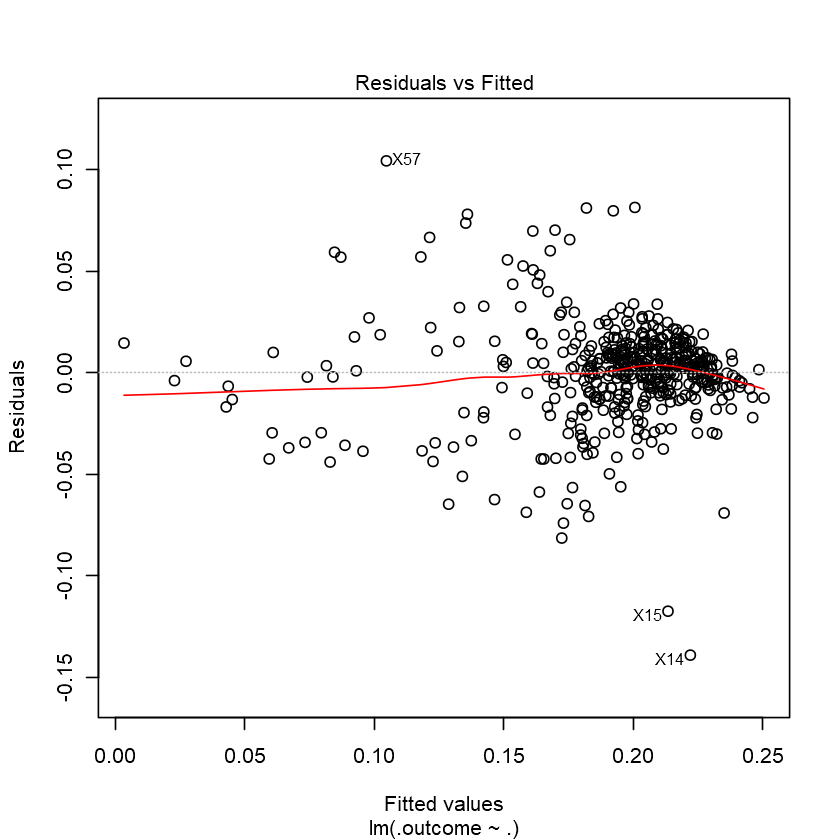

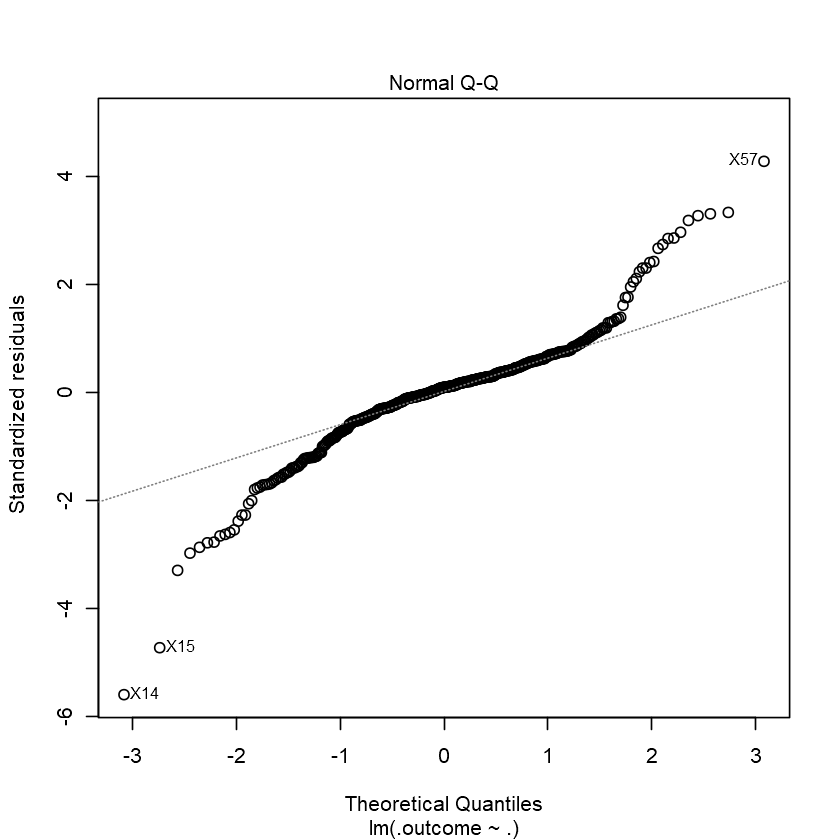

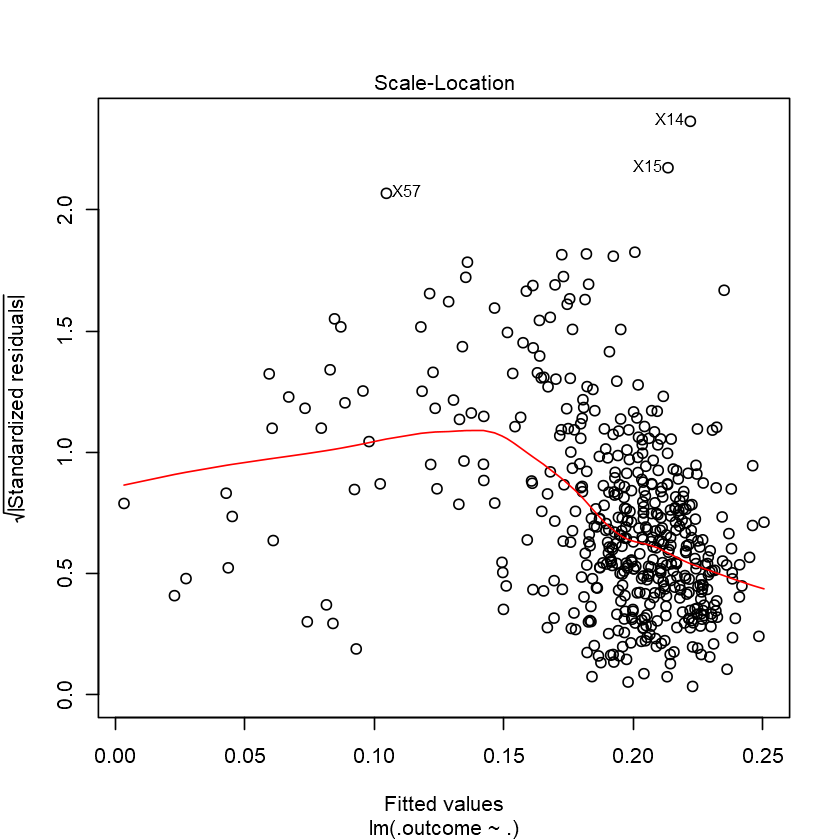

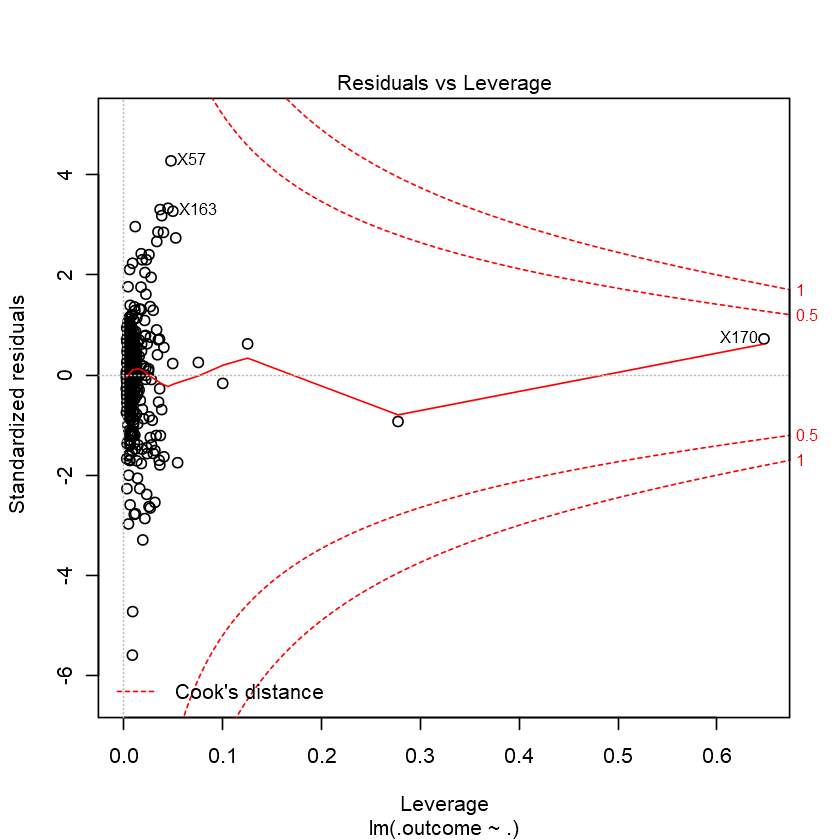

In [55]:
#Analysis of MLR model
plot(modelLR$finalModel)

Warning message:
"Removed 2 rows containing missing values (geom_point)."


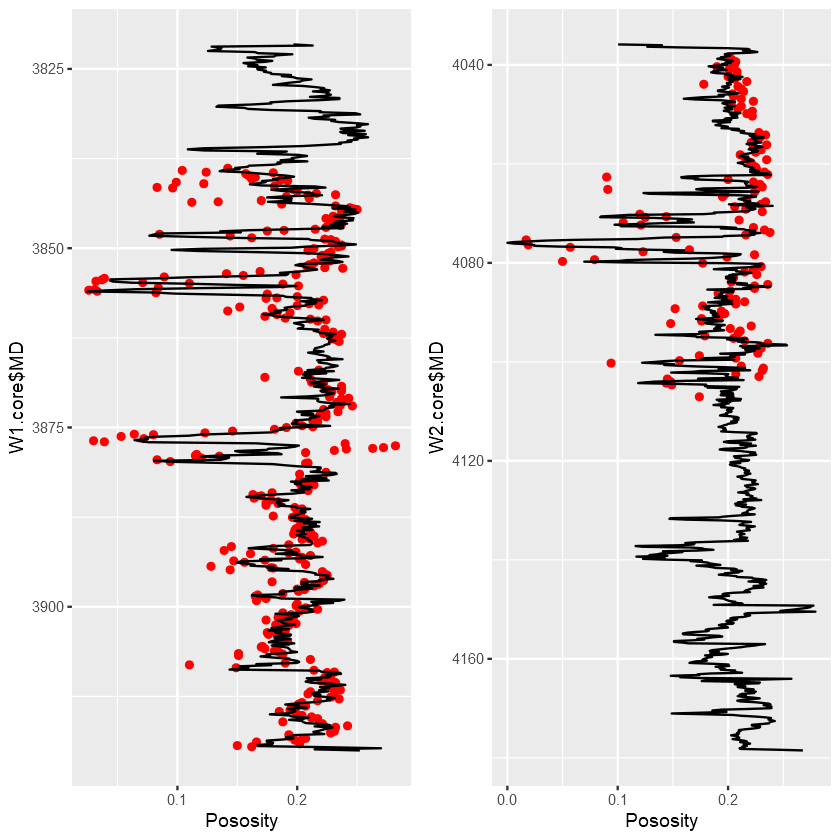

In [61]:
#Plot core data with model prediction
pred.W1.MLR <- predict(modelLR, W1.log[-c(6)])
pW1.pred <- ggplot()+ geom_point(aes(x = W1.core$MD, y = W1.core$POROSITY),color = "red") +
            geom_line(aes(x = W1.log$MD, y = pred.W1.MLR)) + 
            coord_flip() + ylab("Pososity") + xlab("MD") + scale_x_reverse()

pred.W2.MLR <- predict(modelLR, W2.log[-c(6)])
pW2.pred <- ggplot()+ geom_point(aes(x = W2.core$MD, y = W2.core$POROSITY),color = "red") +
            geom_line(aes(x = W2.log$MD, y = pred.W2.MLR)) + 
            coord_flip() + ylab("Pososity") + xlab("MD") + scale_x_reverse()

ggarrange(pW1.pred,pW2.pred,nrow = 1)

In [64]:
#Support vector machine model
model_svm <- train(
  POROSITY ~ GR + DT + NPHI + RHOB + RT, 
  data = W.core[,-c(1,3)],
  method = "svmRadial",
  na.action = na.omit,
  tuneLength = 10,
  #preProc = c("center","scale"),
  trControl = trainControl(
    method = "cv",  
    number=10,
    savePred=TRUE,
    verboseIter = TRUE
  )
)

+ Fold01: sigma=0.613, C=  0.25 
- Fold01: sigma=0.613, C=  0.25 
+ Fold01: sigma=0.613, C=  0.50 
- Fold01: sigma=0.613, C=  0.50 
+ Fold01: sigma=0.613, C=  1.00 
- Fold01: sigma=0.613, C=  1.00 
+ Fold01: sigma=0.613, C=  2.00 
- Fold01: sigma=0.613, C=  2.00 
+ Fold01: sigma=0.613, C=  4.00 
- Fold01: sigma=0.613, C=  4.00 
+ Fold01: sigma=0.613, C=  8.00 
- Fold01: sigma=0.613, C=  8.00 
+ Fold01: sigma=0.613, C= 16.00 
- Fold01: sigma=0.613, C= 16.00 
+ Fold01: sigma=0.613, C= 32.00 
- Fold01: sigma=0.613, C= 32.00 
+ Fold01: sigma=0.613, C= 64.00 
- Fold01: sigma=0.613, C= 64.00 
+ Fold01: sigma=0.613, C=128.00 
- Fold01: sigma=0.613, C=128.00 
+ Fold02: sigma=0.613, C=  0.25 
- Fold02: sigma=0.613, C=  0.25 
+ Fold02: sigma=0.613, C=  0.50 
- Fold02: sigma=0.613, C=  0.50 
+ Fold02: sigma=0.613, C=  1.00 
- Fold02: sigma=0.613, C=  1.00 
+ Fold02: sigma=0.613, C=  2.00 
- Fold02: sigma=0.613, C=  2.00 
+ Fold02: sigma=0.613, C=  4.00 
- Fold02: sigma=0.613, C=  4.00 
+ Fold02: 

Support Vector Machines with Radial Basis Function Kernel 

485 samples
  5 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 435, 435, 434, 436, 435, 435, ... 
Resampling results across tuning parameters:

  C       RMSE        Rsquared   MAE       
    0.25  0.03062966  0.6088576  0.01919043
    0.50  0.02747282  0.6498951  0.01772015
    1.00  0.02624961  0.6606413  0.01709667
    2.00  0.02523817  0.6746261  0.01675119
    4.00  0.02503677  0.6771169  0.01683470
    8.00  0.02555602  0.6666148  0.01733322
   16.00  0.02654962  0.6433937  0.01803295
   32.00  0.02706765  0.6313137  0.01847506
   64.00  0.02761729  0.6220789  0.01867218
  128.00  0.02852509  0.6108183  0.01903918

Tuning parameter 'sigma' was held constant at a value of 0.6130415
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were sigma = 0.6130415 and C = 4.


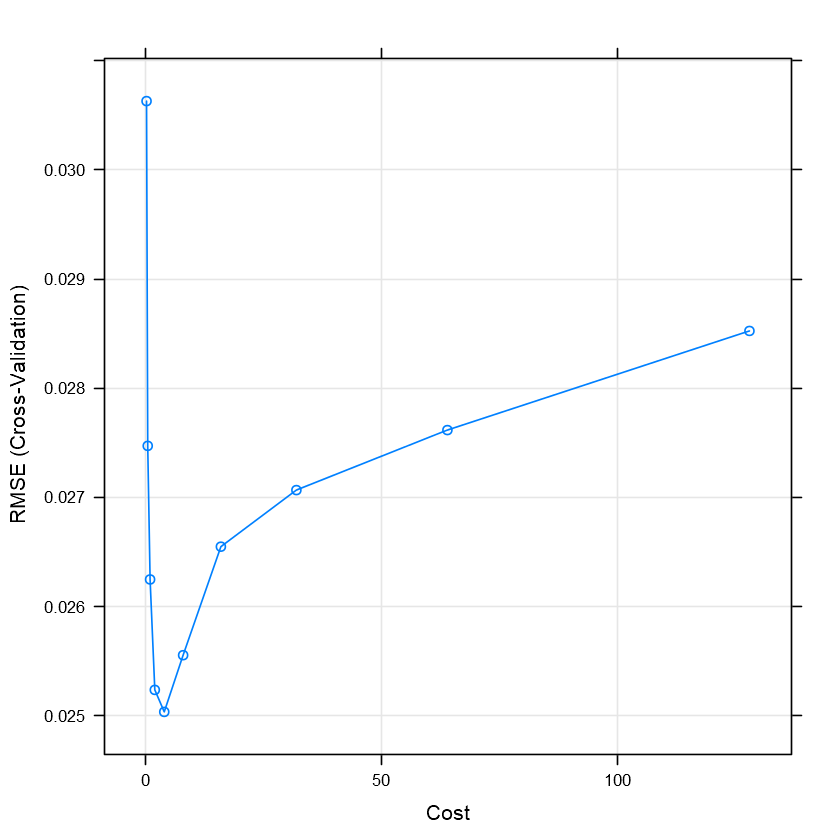

In [68]:
print(model_svm)
plot(model_svm)
#plot(model_svm$finalModel)

Warning message:
"Removed 2 rows containing missing values (geom_point)."


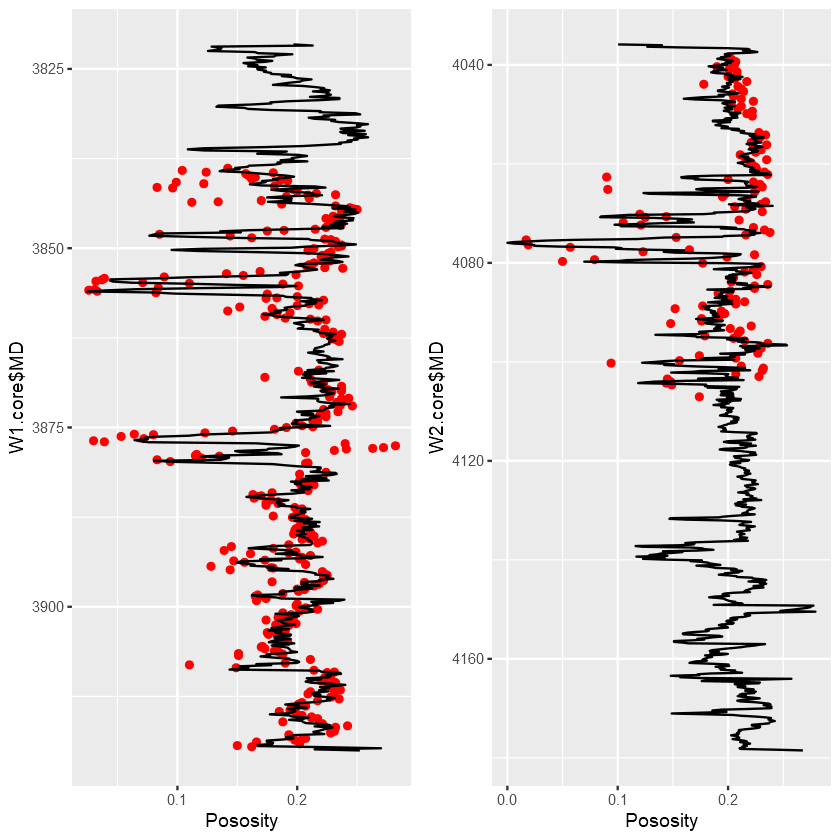

In [69]:
#Plot core data with model prediction
pred.W1.SVM <- predict(model_svm, W1.log[-c(6)])
pW1.pred.SVM <- ggplot()+ geom_point(aes(x = W1.core$MD, y = W1.core$POROSITY),color = "red") +
            geom_line(aes(x = W1.log$MD, y = pred.W1.MLR)) + 
            coord_flip() + ylab("Pososity") + xlab("MD") + scale_x_reverse()

pred.W2.SVM <- predict(model_svm, W2.log[-c(6)])
pW2.pred.SVM <- ggplot()+ geom_point(aes(x = W2.core$MD, y = W2.core$POROSITY),color = "red") +
            geom_line(aes(x = W2.log$MD, y = pred.W2.MLR)) + 
            coord_flip() + ylab("Pososity") + xlab("MD") + scale_x_reverse()

ggarrange(pW1.pred.SVM,pW2.pred.SVM,nrow = 1)

In [78]:
#Neural netowork model
model_nnt <- train(
  POROSITY ~ GR + DT + NPHI + RHOB + RT, 
  data = W.core[,-c(1,3)],
  method = "nnet",
  na.action = na.omit,
  linout=T,
  #preProc = c("center", "scale"),
  tuneLength =10,
  trace = FALSE,
  trControl = trainControl(
    method = "cv",  #LGOCV, repeatedcv
    number=10,
    savePred=TRUE
    )
)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


In [79]:
print(model_nnt)

Neural Network 

485 samples
  5 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 435, 436, 433, 434, 434, 434, ... 
Resampling results across tuning parameters:

  size  decay         RMSE        Rsquared   MAE       
   1    0.0000000000  0.04103289  0.3387408  0.02958864
   1    0.0001000000  0.03980893  0.3293203  0.02836547
   1    0.0002371374  0.04123930  0.2497113  0.02955656
   1    0.0005623413  0.03952435  0.2381353  0.02801870
   1    0.0013335214  0.02803623  0.5807324  0.01903734
   1    0.0031622777  0.03443847  0.3801687  0.02465021
   1    0.0074989421  0.02823417  0.5890847  0.01999838
   1    0.0177827941  0.02624379  0.6617564  0.01770468
   1    0.0421696503  0.03247968  0.4810370  0.02195642
   1    0.1000000000  0.03204302  0.5043106  0.02163413
   3    0.0000000000  0.03709923  0.4238177  0.02591822
   3    0.0001000000  0.03147377  0.4422068  0.02202205
   3    0.0002371374  0.02889988  0.5752832  0.02015366
   3    0

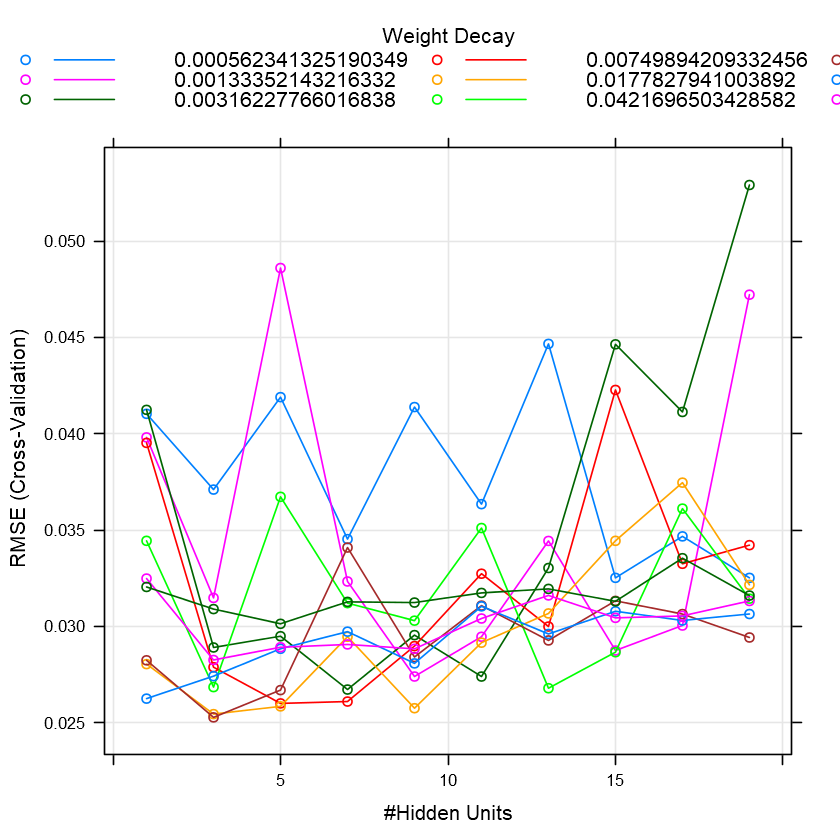

In [80]:
plot(model_nnt)

Warning message:
"Removed 2 rows containing missing values (geom_point)."


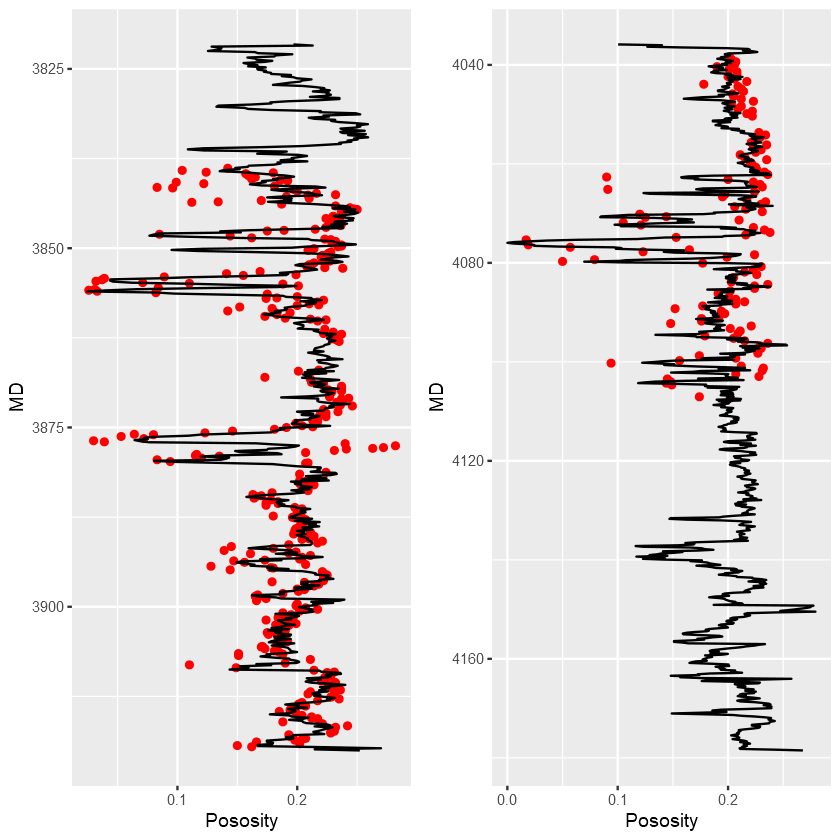

In [82]:
#Plot core data with model prediction
pred.W1.NNT <- predict(model_nnt, W1.log[-c(6)])
pW1.pred.NNT <- ggplot()+ geom_point(aes(x = W1.core$MD, y = W1.core$POROSITY),color = "red") +
            geom_line(aes(x = W1.log$MD, y = pred.W1.MLR)) + 
            coord_flip() + ylab("Pososity") + xlab("MD") + scale_x_reverse()

pred.W2.NNT <- predict(model_nnt, W2.log[-c(6)])
pW2.pred.NNT <- ggplot()+ geom_point(aes(x = W2.core$MD, y = W2.core$POROSITY),color = "red") +
            geom_line(aes(x = W2.log$MD, y = pred.W2.MLR)) + 
            coord_flip() + ylab("Pososity") + xlab("MD") + scale_x_reverse()

ggarrange(pW1.pred.NNT,pW2.pred.NNT,nrow = 1)